In [38]:
import hydra

import numpy as np
import pandas as pd
import plotnine as pn

from hydra.core.global_hydra import GlobalHydra

# Lets us import ibsg modules
import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")

from game.game import Game

In [39]:
all_data_fp = "../../analysis_data/all_data.csv"
df = pd.read_csv(all_data_fp)
df

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,min_epsilon,min_beta
0,1.526090e+00,1.270097,0.641931,2.278652e+00,[0.0054146544510602634],0.012748,1.095495,0.0,simulation,NaN,...,10,squared_dist,1.0,0,replicator_diffusion,0.0,-8.0,6.0,NaN,NaN
1,0.000000e+00,0.000000,1.912028,1.640000e+01,NaN,NaN,NaN,1.0,trajectory,0.0,...,10,squared_dist,1.0,0,replicator_diffusion,0.0,-8.0,6.0,NaN,NaN
2,0.000000e+00,0.000000,1.912028,1.633083e+01,NaN,NaN,NaN,1.0,trajectory,1.0,...,10,squared_dist,1.0,0,replicator_diffusion,0.0,-8.0,6.0,NaN,NaN
3,0.000000e+00,0.000000,1.912028,1.627849e+01,NaN,NaN,NaN,1.0,trajectory,2.0,...,10,squared_dist,1.0,0,replicator_diffusion,0.0,-8.0,6.0,NaN,NaN
4,8.881784e-16,0.000000,1.912028,1.623663e+01,NaN,NaN,NaN,1.0,trajectory,3.0,...,10,squared_dist,1.0,0,replicator_diffusion,0.0,-8.0,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472669,6.643856e+00,NaN,NaN,4.877432e-14,NaN,NaN,NaN,NaN,mse_bound,NaN,...,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
472670,6.643856e+00,NaN,NaN,3.804261e-14,NaN,NaN,NaN,NaN,mse_bound,NaN,...,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
472671,6.643856e+00,NaN,NaN,2.967218e-14,NaN,NaN,NaN,NaN,mse_bound,NaN,...,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
472672,6.643856e+00,NaN,NaN,2.314348e-14,NaN,NaN,NaN,NaN,mse_bound,NaN,...,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
def get_df_subsetted_by_meaning_dists(df: pd.DataFrame, curve_metadata) -> pd.DataFrame:
    """Return a subset of the data consistent with the specifications in the curve_metadata config."""

    # See src/get_all_data.py
    universe = df["universe"].astype(str) == str(curve_metadata.universe)
    prior = df["prior"].astype(str) == str(curve_metadata.prior)
    num_signals = df["num_signals"] == curve_metadata.num_signals # this is prob not necessary
    distance = df["distance"] == curve_metadata.distance

    meaning_dist_gamma = df["meaning_dist_gamma"] == curve_metadata.meaning_dist_gamma


    # imprecise_imitation_gamma = df["imprecise_imitation_gamma"].isin([curve_metadata.meaning_dist_gamma, torch.nan]) # allows curve

    # df_subsetted = df[universe & prior & num_signals & num_signals & distance & meaning_dist_gamma & imprecise_imitation_gamma & bound_func]
    df_subsetted = df[universe & prior & num_signals & num_signals & distance & meaning_dist_gamma]

    return df_subsetted

In [41]:
overrides = [
    "game.universe=100",
    "game.num_signals=100",
    # "game.meaning_dist_gamma=-1",
    "simulation/dynamics=imprecise_conditional_imitation",
    # "simulation.dynamics.max_its=1000", # important to specify maxits
    "seed=0",
] # n.b.: do not include multirun overrides, we will filter from columns in the dataframe.

# Global initialization
GlobalHydra.instance().clear() # from previous runs of notebook
hydra.initialize(version_base=None, config_path="../../conf")
config = hydra.compose(
    config_name="config",
    overrides=overrides,
)

curve_metadata = config.game

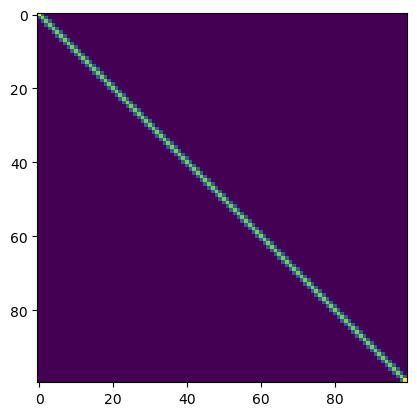

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

game = Game.from_hydra(config, cwd="/Users/nathanielimel/uci/projects/ibsg/data")
plt.imshow(game.meaning_dists)

In [43]:
# visualize the curve!
df = get_df_subsetted_by_meaning_dists(df, curve_metadata)
df

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,min_epsilon,min_beta
2020,4.447281,4.212743,0.898928,3.426674e+00,[0.002361352745593681],0.002931,0.965165,0.0,simulation,NaN,...,100,squared_dist,0.0,0,replicator_diffusion,0.0,2.0,42.0,NaN,NaN
2021,5.901654,4.382777,0.728894,1.587433e+03,NaN,NaN,NaN,1.0,trajectory,0.0,...,100,squared_dist,0.0,0,replicator_diffusion,0.0,2.0,42.0,NaN,NaN
2022,4.061882,3.813843,1.297828,1.655302e+01,NaN,NaN,NaN,1.0,trajectory,1.0,...,100,squared_dist,0.0,0,replicator_diffusion,0.0,2.0,42.0,NaN,NaN
2023,3.810319,3.629811,1.481861,9.329498e+00,NaN,NaN,NaN,1.0,trajectory,2.0,...,100,squared_dist,0.0,0,replicator_diffusion,0.0,2.0,42.0,NaN,NaN
2024,3.774339,3.619316,1.492355,8.249201e+00,NaN,NaN,NaN,1.0,trajectory,3.0,...,100,squared_dist,0.0,0,replicator_diffusion,0.0,2.0,42.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472669,6.643856,NaN,NaN,4.877432e-14,NaN,NaN,NaN,NaN,mse_bound,NaN,...,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
472670,6.643856,NaN,NaN,3.804261e-14,NaN,NaN,NaN,NaN,mse_bound,NaN,...,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
472671,6.643856,NaN,NaN,2.967218e-14,NaN,NaN,NaN,NaN,mse_bound,NaN,...,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
472672,6.643856,NaN,NaN,2.314348e-14,NaN,NaN,NaN,NaN,mse_bound,NaN,...,100,squared_dist,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_final_points = df[df["point_type"] == "simulation"]
df_ib_bound = df[df["point_type"] == "ib_bound"]
df_mse_bound = df[df["point_type"] == "mse_bound"]

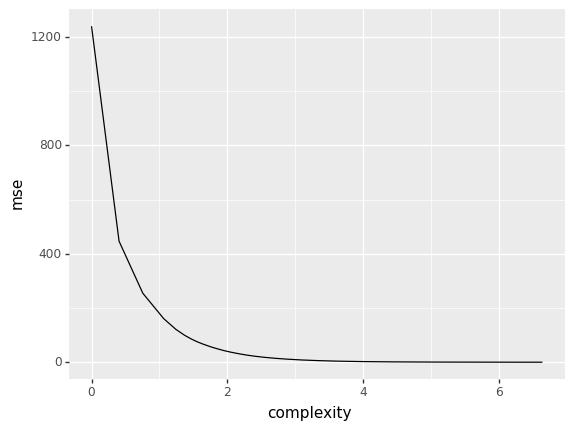

<ggplot: (352135502)>

In [45]:
(
    pn.ggplot(df_mse_bound, pn.aes(x="complexity", y="mse"))
    + pn.geom_line()
)

In [46]:
langs = df_final_points[df_final_points["population_init_gamma"] == -3]
langs

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,min_epsilon,min_beta
3030,4.489670,4.243567,0.868105,3.312659,[8.201692688181161e-05],0.000859,0.983784,0.0,simulation,NaN,...,100,squared_dist,0.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,NaN
4444,4.641383,4.346333,0.765338,2.873285,[0.001041064067377584],0.004055,1.048949,0.0,simulation,NaN,...,100,squared_dist,1.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,NaN
5858,4.066994,3.922360,1.189312,5.179377,[0.0003053330599755988],0.000562,0.853012,0.0,simulation,NaN,...,100,squared_dist,-1.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,NaN
7272,2.601700,2.583351,2.528321,33.559837,[0.0023478986982220507],-0.000091,0.713086,0.0,simulation,NaN,...,100,squared_dist,-3.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,NaN
8686,4.642090,4.346833,0.764838,2.871041,[0.0011331000358179022],0.004252,1.048949,0.0,simulation,NaN,...,100,squared_dist,3.0,0,replicator_diffusion,0.0,-3.0,42.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450882,3.221034,3.175798,1.935873,14.734755,[0.00015822249556762813],-0.000190,0.741383,0.0,simulation,NaN,...,100,squared_dist,-2.0,0,imprecise_conditional_imitation,0.0,-3.0,7.0,NaN,NaN
451884,3.220749,3.175533,1.936139,14.737618,[0.0001973237690601204],-0.000216,0.741383,0.0,simulation,NaN,...,100,squared_dist,-2.0,0,imprecise_conditional_imitation,0.0,-3.0,2.0,NaN,NaN
452886,3.220993,3.175761,1.935910,14.735050,[0.00016129560260724762],-0.000195,0.741383,0.0,simulation,NaN,...,100,squared_dist,-2.0,0,imprecise_conditional_imitation,0.0,-3.0,5.0,NaN,NaN
453888,3.220781,3.175562,1.936110,14.737349,[0.000194134157666781],-0.000213,0.741383,0.0,simulation,NaN,...,100,squared_dist,-2.0,0,imprecise_conditional_imitation,0.0,-3.0,4.0,NaN,NaN


/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


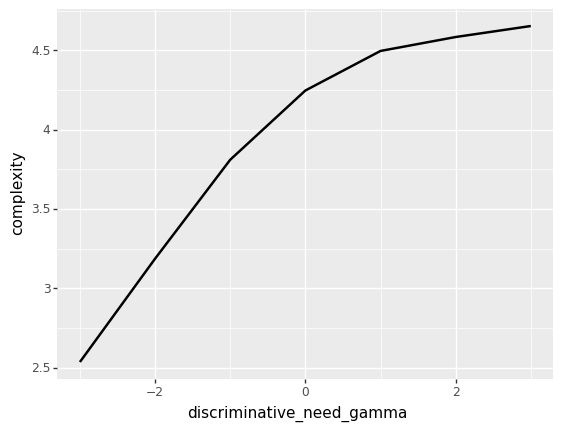

<ggplot: (391537553)>

In [47]:
(
    pn.ggplot(df_final_points, pn.aes(x="discriminative_need_gamma", y="complexity"))
    + pn.geom_smooth()
)

In [48]:
df_final_points["discriminative_need_gamma"] = 10 ** df_final_points["discriminative_need_gamma"]
df_final_points["imprecise_imitation_gamma"] = 10 ** df_final_points["imprecise_imitation_gamma"]

In [49]:
# restrict dynamics
df_final_points = df_final_points[df_final_points["dynamics"] == "replicator_diffusion"]

# Only run this if you're visualizing by discr need and fixing ii to -1
# df_final_points = df_final_points[df_final_points["imprecise_imitation_gamma"] == 10 ** -1]

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 283 rows containing missing values.


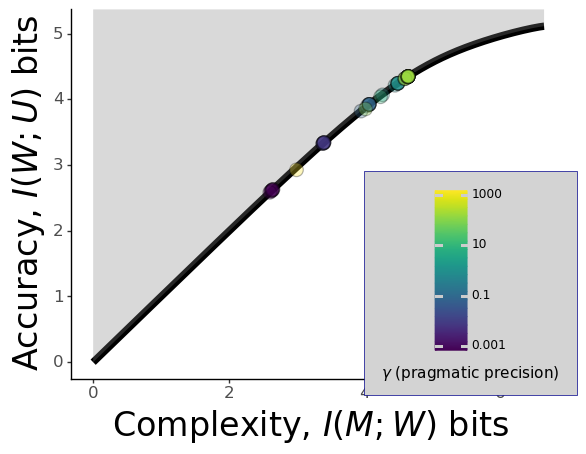

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: evolang_figure
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 283 rows containing missing values.


In [50]:
plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="accuracy")
    )  
    + pn.geom_line(size=3) # IB curve
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=np.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # emergent langs
        data=df_final_points,
        mapping=pn.aes(
            fill="discriminative_need_gamma",
            # fill="imprecise_imitation_gamma",
            ),
        alpha=0.3,
        size=5,
    )
    + pn.labs(fill="$\\gamma$ (pragmatic precision)")
    # + pn.labs(fill="$\\alpha$ (perceptual certainty)")    
    + pn.scale_fill_continuous(
        trans = "log10",
    )
    + pn.xlim([0,np.log2(100)])
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("Accuracy, $I(W;U)$ bits")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        legend_position=(0.75, 0.31),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            ),
    ) 
)
print(plot)
plot.save("evolang_figure", width=6, height=6, dpi=300,)

In [51]:
# restrict to one specific gamma at a time
gammas = [
    0.001,
    0.01,
    0.1,
    1.0,
    10.0,
    100.0,
    1000.0,
]
df_final_points = df_final_points[df_final_points["discriminative_need_gamma"].isin(gammas)]

In [52]:
# df_final_points = df_final_points[df_final_points["population_init_gamma"] == -3]
df_final_points

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,min_epsilon,min_beta
2020,4.447281,4.212743,0.898928,3.426674,[0.002361352745593681],0.002931,0.965165,0.0,simulation,NaN,...,100,squared_dist,1.000,0,replicator_diffusion,1.0,2.0,42.0,NaN,NaN
2222,4.263799,4.067916,1.043755,4.044479,[0.008306967121308184],-0.000887,0.918619,0.0,simulation,NaN,...,100,squared_dist,1.000,0,replicator_diffusion,1.0,3.0,42.0,NaN,NaN
2424,4.489587,4.243513,0.868158,3.312854,[8.985982056131103e-05],0.000829,0.983784,0.0,simulation,NaN,...,100,squared_dist,1.000,0,replicator_diffusion,1.0,-1.0,42.0,NaN,NaN
2626,4.487702,4.242160,0.869511,3.318288,[0.00033322532865187604],0.000288,0.983784,0.0,simulation,NaN,...,100,squared_dist,1.000,0,replicator_diffusion,1.0,1.0,42.0,NaN,NaN
2828,4.489798,4.243652,0.868020,3.312398,[7.257187215614636e-05],0.000902,0.983784,0.0,simulation,NaN,...,100,squared_dist,1.000,0,replicator_diffusion,1.0,0.0,42.0,NaN,NaN
3030,4.489670,4.243567,0.868105,3.312659,[8.201692688181161e-05],0.000859,0.983784,0.0,simulation,NaN,...,100,squared_dist,1.000,0,replicator_diffusion,1.0,-3.0,42.0,NaN,NaN
3232,4.488798,4.242955,0.868716,3.315234,[0.00018996789804515135],0.000594,0.983784,0.0,simulation,NaN,...,100,squared_dist,1.000,0,replicator_diffusion,1.0,-2.0,42.0,NaN,NaN
3434,4.589134,4.311201,0.800470,3.005718,[0.0011036690439107932],-0.000134,1.030330,0.0,simulation,NaN,...,100,squared_dist,10.000,0,replicator_diffusion,1.0,2.0,42.0,NaN,NaN
3636,4.235087,4.038380,1.073291,4.227298,[0.014292735931932365],0.000010,0.918619,0.0,simulation,NaN,...,100,squared_dist,10.000,0,replicator_diffusion,1.0,3.0,42.0,NaN,NaN
3838,4.641307,4.346325,0.765346,2.873073,[0.0010410879948633545],0.003990,1.048949,0.0,simulation,NaN,...,100,squared_dist,10.000,0,replicator_diffusion,1.0,-1.0,42.0,NaN,NaN


In [53]:
df_final_points["discriminative_need_gamma"] = df_final_points["discriminative_need_gamma"].astype(str)

In [54]:
# this is a dirty and beautiful hack from
# https://waldyrious.net/viridis-palette-generator/
fill_values_dict = {
    str(k): v for k, v in {
        "0.001": "#440154",
        "0.01": "#443983",
        "0.1": "#31688e",
        "1.0": "#21918c",
        "10.0": "#35b779",
        "100.0" : "#90d743",
        "1000.0": "#fde725", 
    }.items() }


In [55]:
# Make sure complexity max is np.log2(100)
df_ib_bound.complexity.max()

6.643856189779928

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 283 rows containing missing values.


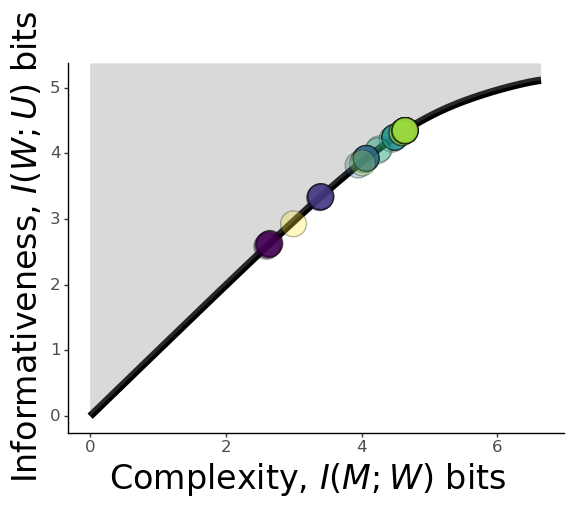

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 10 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: slide_figure
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 283 rows containing missing values.


In [56]:
# for slides

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="accuracy")
    )  
    + pn.geom_line(size=3) # IB curve
    # + pn.geom_point(size=1)
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=np.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
)

if True:
    plot = (
        plot 
        + pn.geom_jitter( # emergent langs
            data=df_final_points,
            mapping=pn.aes(
                # fill="discr_need",
                fill="discriminative_need_gamma",
                # shape="language",
                ),
            alpha=0.3,
            size=10,
            # fill="orange",
        )
        + pn.labs(fill="$\\gamma$ (pragmatic precision)")
        # + pn.scale_fill_continuous(
        #     trans = "log10",
        # )
        + pn.scale_fill_manual(values = fill_values_dict) 
    )
    
plot = (
    plot
    + pn.xlim([0,np.log2(100)])
    + pn.xlab("Complexity, $I(M;W)$ bits")
    # + pn.ylab("Accuracy, $I(W;U)$ bits")
    + pn.ylab("Informativeness, $I(W;U)$ bits")


    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.4),
        legend_position='none',
    )    
)

print(plot)
plot.save("slide_figure", width=10, height=10, dpi=300,)

# df_final_points["discriminative_need_gamma"] = df_final_points["discriminative_need_gamma"].astype(float)

In [57]:
df_traj_points = df[df["point_type"] == "trajectory"]

df_traj_points["iteration"] = df_traj_points["round"]

# restrict dynamics
# df_traj_points = df_traj_points[df_traj_points["dynamics"] == "replicator_diffusion"]
df_traj_points = df_traj_points[df_traj_points["dynamics"] == "imprecise_conditional_imitation"]

# restrict the initialization and gamma
new_df = df_traj_points.loc[(df_traj_points['population_init_gamma'] == -3) & (df_traj_points["discriminative_need_gamma"] == 3) & (df_traj_points["imprecise_imitation_gamma"] == 0)] # was -1


# optionally filter points
# new_df = new_df[new_df["iteration"] == new_df["iteration"].max()]


In [58]:
df_fudge = pd.DataFrame(
    {
        "complexity": 0.,
        "accuracy": 0.,
        "point_type": "trajectory",
        "round": 0.,
        "discriminative_need_gamma": -3.0,
        "population_init_gamma": 3.0,
        "iteration": 0.,
    },
    index=[0]
)
df_fudge
# new_df = pd.concat([df_fudge, new_df])

new_df

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,min_epsilon,min_beta,iteration
317189,7.142193e-07,2.836471e-07,5.111671,1666.363128,NaN,NaN,NaN,1.0,trajectory,0.0,...,squared_dist,3.0,0,imprecise_conditional_imitation,0.0,-3.0,6.0,NaN,NaN,0.0
317190,3.863978e-07,3.140760e-07,5.111671,1666.194289,NaN,NaN,NaN,1.0,trajectory,1.0,...,squared_dist,3.0,0,imprecise_conditional_imitation,0.0,-3.0,6.0,NaN,NaN,1.0
317191,1.087180e-06,9.714140e-07,5.111670,1666.071853,NaN,NaN,NaN,1.0,trajectory,2.0,...,squared_dist,3.0,0,imprecise_conditional_imitation,0.0,-3.0,6.0,NaN,NaN,2.0
317192,3.546016e-06,3.279870e-06,5.111668,1665.971832,NaN,NaN,NaN,1.0,trajectory,3.0,...,squared_dist,3.0,0,imprecise_conditional_imitation,0.0,-3.0,6.0,NaN,NaN,3.0
317193,1.226488e-05,1.154976e-05,5.111660,1665.884818,NaN,NaN,NaN,1.0,trajectory,4.0,...,squared_dist,3.0,0,imprecise_conditional_imitation,0.0,-3.0,6.0,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326402,4.625373e+00,4.336278e+00,0.775393,2.911992,NaN,NaN,NaN,1.0,trajectory,995.0,...,squared_dist,3.0,0,imprecise_conditional_imitation,0.0,-3.0,3.0,NaN,NaN,995.0
326403,4.625373e+00,4.336278e+00,0.775393,2.911992,NaN,NaN,NaN,1.0,trajectory,996.0,...,squared_dist,3.0,0,imprecise_conditional_imitation,0.0,-3.0,3.0,NaN,NaN,996.0
326404,4.625373e+00,4.336278e+00,0.775393,2.911992,NaN,NaN,NaN,1.0,trajectory,997.0,...,squared_dist,3.0,0,imprecise_conditional_imitation,0.0,-3.0,3.0,NaN,NaN,997.0
326405,4.625373e+00,4.336278e+00,0.775393,2.911992,NaN,NaN,NaN,1.0,trajectory,998.0,...,squared_dist,3.0,0,imprecise_conditional_imitation,0.0,-3.0,3.0,NaN,NaN,998.0


/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 283 rows containing missing values.


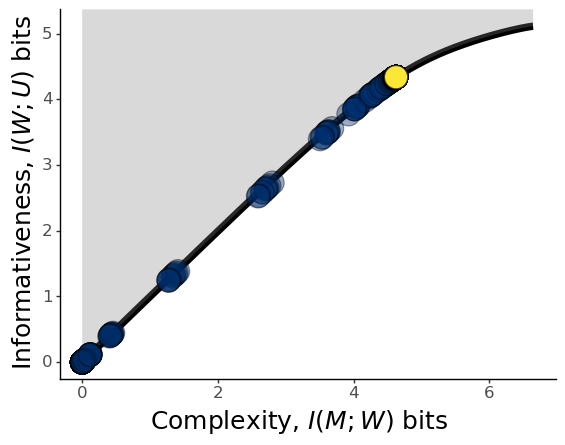

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: temp_slide_traj
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 283 rows containing missing values.


In [59]:

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="accuracy")
    )
    # + pn.geom_point(size=1)
    + pn.geom_line(size=3) # IB curve    
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=np.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # trajectories
    # + pn.geom_line(
        data=new_df,
        mapping=pn.aes(
            fill="iteration",
            # color="imprecise_imitation_gamma"
            # color="population_init_gamma",
            ),
        alpha=0.4,
        size=9,
    )
    # + pn.labs(fill="iteration")
    # + pn.scale_fill_continuous("cividis")
    + pn.scale_fill_continuous(
        "cividis",
        breaks=[0, 50, 100, 150, 200],
        limits=[0, 200],
    )
    + pn.labs(fill="Evolution\n\nstep\n")
    + pn.xlim([0,np.log2(100)])
    + pn.xlab("Complexity, $I(M;W)$ bits")
    # + pn.ylab("Accuracy, $I(W;U)$ bits")
    + pn.ylab("Informativeness, $I(W;U)$ bits")
    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=18),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.45),
        legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, 
            linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "bottom",
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = -2.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
)
print(plot)
plot.save("temp_slide_traj", width=6, height=6, dpi=300,)

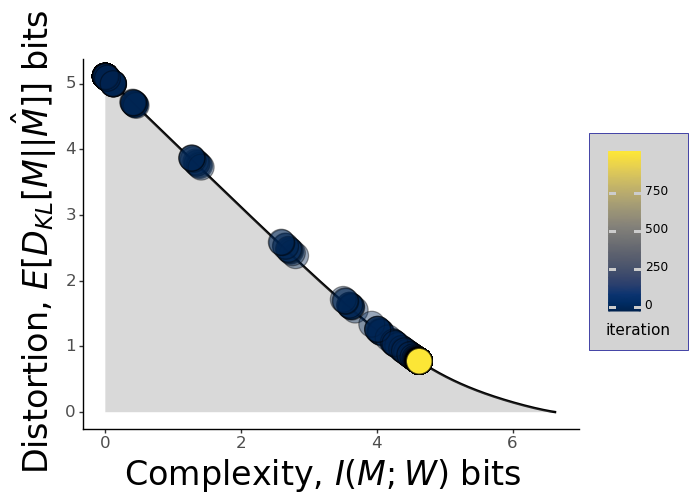

In [60]:

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="distortion")
    )  
    # + pn.geom_point(size=1)
    + pn.geom_line(size=1) # IB curve    
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin=0,
        ymax="distortion",
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # trajectories
    # + pn.geom_line(
        data=new_df,
        mapping=pn.aes(
            fill="iteration",
            # color="imprecise_imitation_gamma"
            # color="population_init_gamma",
            ),
        alpha=0.4,
        size=10,
    )
    + pn.scale_fill_continuous("cividis")
    # + pn.labs(fill="iteration")
    # + pn.scale_fill_continuous(
    #     type="magma",
    #     breaks=[0, 50, 100, 150, 200],
    #     limits=[0, 200],
    # )
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("Distortion, $E[D_{KL}[M || \hat{M}]]$ bits")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.325),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = 2.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
)
print(plot)

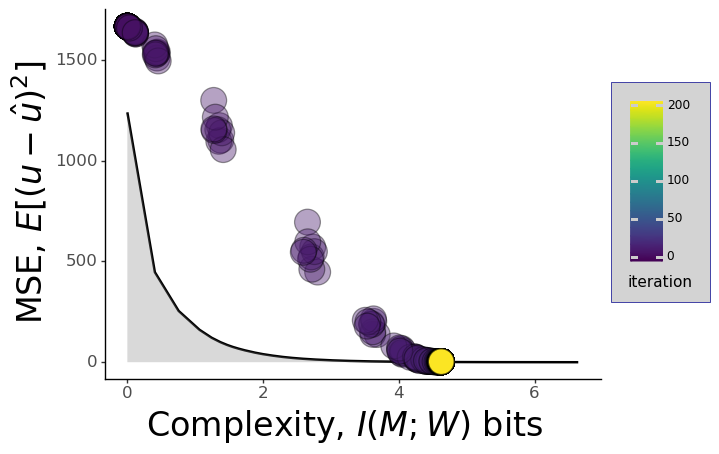

In [61]:

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_mse_bound, mapping=pn.aes(x="complexity", y="mse")
    )  
    # + pn.geom_point(size=1)
    + pn.geom_line(size=1) # IB curve
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin=0,
        ymax="mse",
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # trajectories
    # + pn.geom_line(
        data=new_df,
        mapping=pn.aes(
            fill="iteration",
            # color="imprecise_imitation_gamma"
            # color="population_init_gamma",
            ),
        alpha=0.4,
        size=10,
    )

    + pn.labs(fill="iteration")
    + pn.scale_fill_continuous(
        breaks=[0, 50, 100, 150, 200],
        limits=[0, 200],
    )
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("MSE, $E[(u - \hat{u})^2]$")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.325),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = 2.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
)
print(plot)

## Analyze trajectories
Are distances from curve always monotonically decreasing with evolution step?

In [62]:
df_traj_points

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,min_epsilon,min_beta,iteration
11919,5.700037,4.230767,0.880905,1916.311862,NaN,NaN,NaN,1.0,trajectory,0.0,...,squared_dist,0.0,0,imprecise_conditional_imitation,0.0,2.0,6.0,NaN,NaN,0.0
11920,4.063767,3.801191,1.310480,259.032955,NaN,NaN,NaN,1.0,trajectory,1.0,...,squared_dist,0.0,0,imprecise_conditional_imitation,0.0,2.0,6.0,NaN,NaN,1.0
11921,3.954168,3.763000,1.348672,109.307059,NaN,NaN,NaN,1.0,trajectory,2.0,...,squared_dist,0.0,0,imprecise_conditional_imitation,0.0,2.0,6.0,NaN,NaN,2.0
11922,3.945152,3.772649,1.339022,34.207610,NaN,NaN,NaN,1.0,trajectory,3.0,...,squared_dist,0.0,0,imprecise_conditional_imitation,0.0,2.0,6.0,NaN,NaN,3.0
11923,3.961786,3.797305,1.314366,7.438982,NaN,NaN,NaN,1.0,trajectory,4.0,...,squared_dist,0.0,0,imprecise_conditional_imitation,0.0,2.0,6.0,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465106,3.220739,3.175522,1.936149,14.737861,NaN,NaN,NaN,1.0,trajectory,995.0,...,squared_dist,-2.0,0,imprecise_conditional_imitation,0.0,-2.0,3.0,NaN,NaN,995.0
465107,3.220740,3.175522,1.936149,14.737858,NaN,NaN,NaN,1.0,trajectory,996.0,...,squared_dist,-2.0,0,imprecise_conditional_imitation,0.0,-2.0,3.0,NaN,NaN,996.0
465108,3.220740,3.175523,1.936149,14.737855,NaN,NaN,NaN,1.0,trajectory,997.0,...,squared_dist,-2.0,0,imprecise_conditional_imitation,0.0,-2.0,3.0,NaN,NaN,997.0
465109,3.220740,3.175523,1.936148,14.737853,NaN,NaN,NaN,1.0,trajectory,998.0,...,squared_dist,-2.0,0,imprecise_conditional_imitation,0.0,-2.0,3.0,NaN,NaN,998.0


In [63]:
# Restrict to ii=-1
df_traj_analysis = df_traj_points[df_traj_points["imprecise_imitation_gamma"] == 0]

gamma = 'discriminative_need_gamma'

df_traj_analysis = df_traj_analysis[["iteration", "min_distance_to_curve", "min_epsilon", "min_beta", gamma, "population_init_gamma", "complexity", "accuracy"]]

# df_traj_analysis = df_traj_analysis[df_traj_analysis[gamma] == 0.] 

df_traj_analysis[gamma] = 10 ** df_traj_analysis[gamma]
df_traj_analysis["population_init_gamma"] = 10 ** df_traj_analysis["population_init_gamma"]

df_traj_analysis["discriminative_need_gamma"] = df_traj_analysis["discriminative_need_gamma"].astype(str)

df_traj_analysis

,iteration,min_distance_to_curve,min_epsilon,min_beta,discriminative_need_gamma,population_init_gamma,complexity,accuracy
11919,0.0,0.594773,NaN,NaN,1.0,100.00,5.700037,4.230767
11920,1.0,0.091869,NaN,NaN,1.0,100.00,4.063767,3.801191
11921,2.0,0.051145,NaN,NaN,1.0,100.00,3.954168,3.763000
11922,3.0,0.038062,NaN,NaN,1.0,100.00,3.945152,3.772649
11923,4.0,0.029660,NaN,NaN,1.0,100.00,3.961786,3.797305
...,...,...,...,...,...,...,...,...
465106,995.0,0.000904,NaN,NaN,0.01,0.01,3.220739,3.175522
465107,996.0,0.000903,NaN,NaN,0.01,0.01,3.220740,3.175522
465108,997.0,0.000903,NaN,NaN,0.01,0.01,3.220740,3.175523
465109,998.0,0.000903,NaN,NaN,0.01,0.01,3.220740,3.175523


In [64]:
# Ensure iteration max is the same as max_its specified by game config
df_traj_analysis.iteration.max()

999.0

In [65]:
# geom line not behaving like expected, so let's save and try in R
df_traj_analysis.to_csv("trajectory_analysis_data.csv", index=False)

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 20 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:72: PlotnineWarning: colorbar guide needs continuous scales


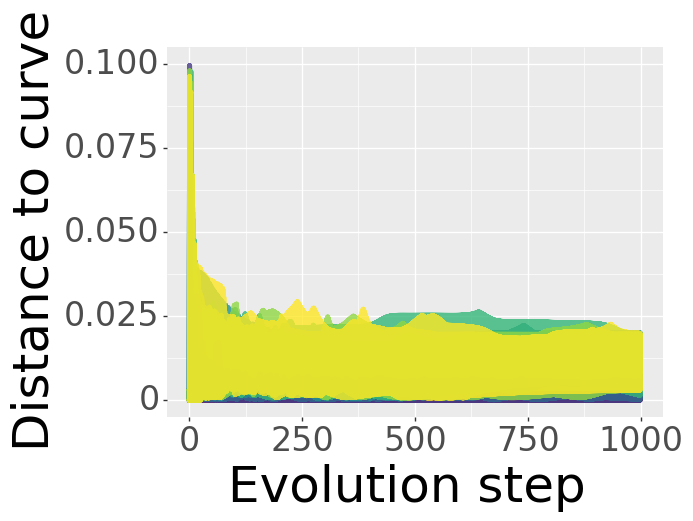

In [66]:
plot = (
    pn.ggplot(
        df_traj_analysis,
        pn.aes(
            x="iteration", 
            y="min_distance_to_curve", 
        ),
    )
    + pn.geom_line(
        pn.aes(color="discriminative_need_gamma"),
        size=2,
        alpha=0.8,
        )
    # + pn.scale_color_continuous(
        # trans = "log10",
    # )
    + pn.scale_color_manual(values = fill_values_dict)
    + pn.labs(color="$\\gamma$ (pragmatic precision)")    
    + pn.xlab("Evolution step")
    + pn.ylab("Distance to curve")
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=36),
        axis_text=pn.element_text(size=24),
        # Legend position
        legend_position=(0.7, 0.6),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    + pn.guides(
        color = pn.guide_colorbar(
            title_position = "bottom", 
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            ),
    )
    # + pn.scale_y_continuous(
        # trans='log10', 
        # limits=[1e-5, 1.],
    # )
    + pn.ylim(0,0.1)
)
print(plot)
# plot.save("distance_plot.png", width=6, height=6, dpi=300,)

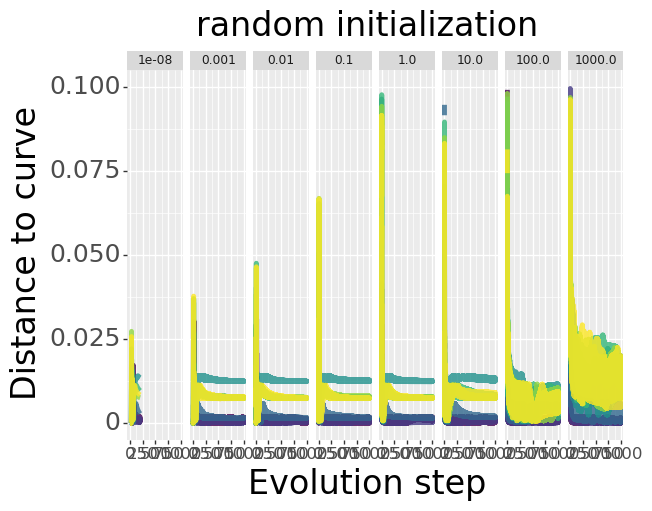

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 18 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: distances_plot.png


In [67]:
plot = (
    plot 
    + pn.facet_grid(". ~ population_init_gamma") 
    + pn.ggtitle("random initialization")
    + pn.theme(
        title=pn.element_text(size=24),
        axis_text_x=pn.element_text(size=12),
        axis_text_y=pn.element_text(size=18),
        legend_position='none',
    )

)

print(plot)
plot.save("distances_plot.png", width=18, height=6, dpi=300,)

Focus on one individual initialization

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:72: PlotnineWarning: colorbar guide needs continuous scales


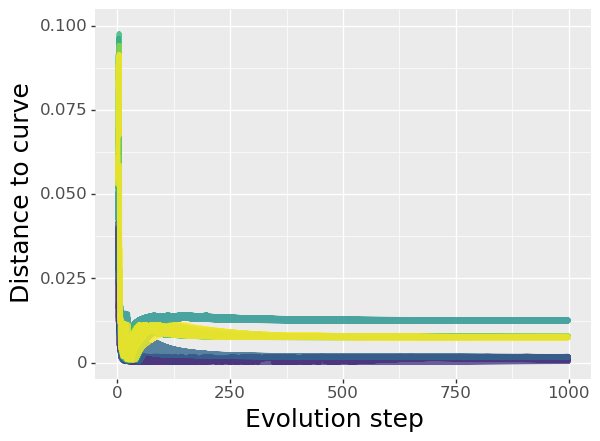

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: distance_plot.png


/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:72: PlotnineWarning: colorbar guide needs continuous scales


In [68]:
plot = (
    pn.ggplot(
        df_traj_analysis[df_traj_analysis["population_init_gamma"] == 1.],
        pn.aes(
            x="iteration", 
            y="min_distance_to_curve", 
        ),
    )
    + pn.geom_line(
        pn.aes(color="discriminative_need_gamma"),
        size=2,
        alpha=0.8,
        )
    + pn.scale_color_manual(values = fill_values_dict)
    + pn.labs(color="$\\gamma$ (pragmatic precision)")    
    + pn.xlab("Evolution step")
    + pn.ylab("Distance to curve")
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=18),
        axis_text=pn.element_text(size=12),
        # Legend position
        legend_position=(0.7, 0.6),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    + pn.guides(
        color = pn.guide_colorbar(
            title_position = "bottom", 
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            ),
    )
    + pn.scale_y_continuous(
        # trans='log10', 
        limits=[1e-4, 0.1],
    )
    # + pn.ylim(0,0.1)
    # + pn.xlim(0,50)
)
print(plot)
plot.save("distance_plot.png", width=6, height=6, dpi=300,)

In [69]:
(
    plot
    + pn.scale_y_continuous(
        trans='log10', 
        limits=[1e-4, 1.],
    )
    + pn.theme(
        axis_title=pn.element_blank(),
        # axis_text=pn.element_blank(),
    )
).save("distance_plot_zoomed.png", width=8, height=6, dpi=300,)

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/scales/scales.py:36: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: distance_plot_zoomed.png
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:72: PlotnineWarning: colorbar guide needs continuous scales


### Efficiency loss over trajectories

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 7209 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:72: PlotnineWarning: colorbar guide needs continuous scales


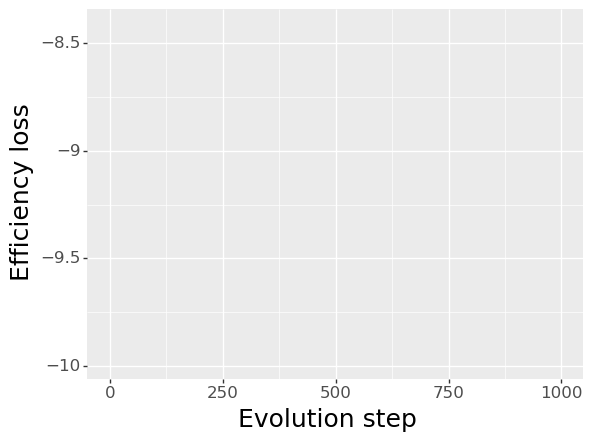

In [70]:
plot = (
    pn.ggplot(
        df_traj_analysis[df_traj_analysis["population_init_gamma"] == 1.],
        pn.aes(
            x="iteration", 
            y="min_epsilon", 
        ),
    )
    + pn.geom_line(
        pn.aes(color="discriminative_need_gamma"),
        size=2,
        alpha=0.8,
        )
    + pn.scale_color_manual(values = fill_values_dict)
    + pn.labs(color="$\\gamma$ (pragmatic precision)")    
    + pn.xlab("Evolution step")
    + pn.ylab("Efficiency loss")
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=18),
        axis_text=pn.element_text(size=12),
        # Legend position
        legend_position=(0.7, 0.6),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    + pn.guides(
        color = pn.guide_colorbar(
            title_position = "bottom", 
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            ),
    )
)
print(plot)

In [71]:
from scipy.stats import spearmanr, kendalltau

# for each gamma, compute monotonicity for min_distances
result = df_traj_analysis.groupby(gamma).apply(lambda group: kendalltau(group['min_distance_to_curve'], group['iteration'])).reset_index()
result.columns=[gamma, "result"]

In [72]:
# Extract correlation coefficients and p-values into separate columns
result[['kendall_tau', 'p_value']] = result['result'].apply(pd.Series)
result = result.drop(columns=['result'])
result

,discriminative_need_gamma,kendall_tau,p_value
0,0.001,0.007600,3.780577e-03
1,0.01,-0.095627,1.037709e-290
2,0.1,-0.294663,0.000000e+00
3,1.0,-0.154905,0.000000e+00
4,10.0,-0.209629,0.000000e+00
5,100.0,-0.278695,0.000000e+00
6,1000.0,-0.255105,0.000000e+00


/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


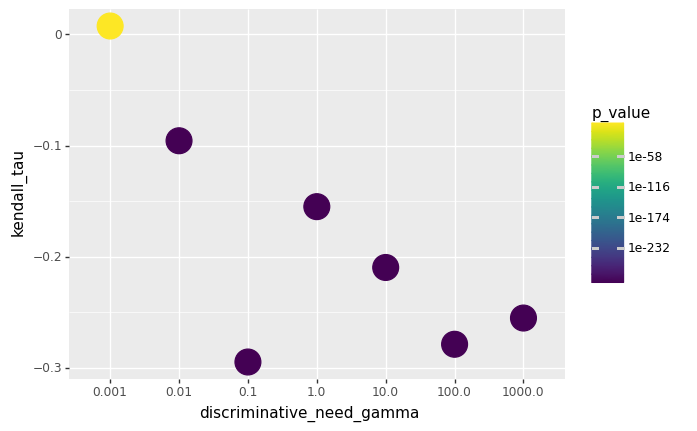

<ggplot: (391358987)>

In [73]:
(
    pn.ggplot(
        result,
        pn.aes(x=gamma, y="kendall_tau", color="p_value")
    )
    + pn.scale_color_continuous(
        trans = "log10",
    )
    + pn.geom_point(size=10)
)

Try to get some trajectories

In [74]:

df_traj_ = df_traj_analysis[df_traj_analysis["population_init_gamma"] == 1.]
df_final_ = df_final_points[df_final_points["population_init_gamma"] == 1.]

(
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="accuracy")
    )
    # + pn.geom_point(size=1)
    + pn.geom_line(size=3) # IB curve
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=np.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_line( # trajectories
    # + pn.geom_line(
        data=df_traj_,
        mapping=pn.aes(
            color=gamma,
            ),
        alpha=0.8,
        size=2,
    )
    + pn.geom_point( # Final points
    # + pn.geom_line(
        data=df_final_,
        mapping=pn.aes(
            color=gamma,
            ),
        # alpha=0.8,
        size=5,
        shape="X",
    )    
    + pn.scale_color_manual(values = fill_values_dict)
    + pn.labs(color="$\\gamma$ (pragmatic precision)")    

    # + pn.xlim([0,np.log2(100)])
    + pn.xlim([0., 3.2,])    
    + pn.ylim([0., 3.,])
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("Accuracy, $I(W;U)$ bits")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=18),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.45),
        legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = 2.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
).save("trajectory_plot_zoomed.png", width=8, height=6, dpi=300,)

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: trajectory_plot_zoomed.png
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1015 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 9160 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


## TODO: 
- clean up and standardize all the plots you want, put them in a script. 
- also inspect random seed (doubt we'll be able to see a diff)
- or visualize the trajs / distances as curves with one line per intitialization temp, maybe bolding one of them, as if init temp was a random seed.
- we can start by writing a new notebook. But to be careful, copy and paste these instructions into a new file and then git revert the notebooks dir.